In [1008]:
import mne
import glob
import numpy as np
import matplotlib.pyplot as plt

In [1004]:
class ERPCORE:
    def __init__(self,filename,coding_method,path='./'):
        self.raw = mne.io.read_raw_eeglab(path+filename)
        self.coding_method = coding_method
        self.sampling_rate = int(raw.info['sfreq'])+1
        self.epochs = None
        
    def get_events(self,event_id,resmaple=None):
        self.raw.set_channel_types({"HEOG_left": 'eog', "HEOG_right": 'eog', "VEOG_lower": 'eog'})
        events = mne.events_from_annotations(self.raw)
        descriptions = self.raw.annotations.description
        # an inverse map to get real event codes and not arbitrary ones mne assigns 
        inv_map = {v: int(k.astype(np.float)) for k, v in events[1].items()}
        new_event_dict = {np.str(ii):code2type(ii) for ii in range(1,181) if (ii <=80 or ii>=101)}
        new_event_dict[np.str(0)] = 666 # new code for rejection
        # create a new event array
        events_arr = np.zeros(events[0].shape)
        for ii in range(events[0].shape[0]):
            events_arr[ii,0] = events[0][ii][0]
            if self.coding_method(inv_map[events[0][ii][2]]) <= 4 and self.coding_method(inv_map[events[0][ii+1][2]]) == 202:
                events_arr[ii,2] = 666
            else:
                events_arr[ii,2] = code2type(inv_map[events[0][ii][2]])
        incorrect = sum(events_arr[:,2] == 666)/events_arr.shape[0]
        print('There were {0:4f} wrong answers'.format(incorrect))
        tmin = -0.2  # start of each epoch (200ms before the trigger)
        tmax = 0.8  # end of each epoch (800ms after the trigger)
        baseline = (None, 0)  # means from the first instant to t = 0
        n_channels = len(raw.ch_names)
        info = mne.create_info(raw.ch_names, sampling_rate, raw.get_channel_types())
        # To reject find the min stdv in the eog channels
        HEOG_left  = np.std(raw.get_data()[raw.ch_names.index('HEOG_left'),:])
        HEOG_right = np.std(raw.get_data()[raw.ch_names.index('HEOG_right'),:])
        VEOG_lower = np.std(raw.get_data()[raw.ch_names.index('VEOG_lower'),:])
        reject = dict(eog=min(HEOG_left,HEOG_right,VEOG_lower))
        self.epochs = mne.Epochs(raw, events_arr.astype(int), event_id, tmin, tmax, baseline=baseline, reject=reject, preload=True)
        if resmaple:
            self.epochs.resample(resmaple)
            self.sampling_rate = int(resmaple)+1
        return
    
    def evoked(self,condition_lst):
        evoked_lst = []
        for c in condition_lst:
            evoked_lst.append(self.epochs[c].average())
        return evoked_lst

    def plot_evoked(self,evoked_lst,electrode='PO8'):
        xx = [ii*(1000/self.sampling_rate)-200 for ii in range(self.sampling_rate)] 
        for evk in evoked_lst:
            y = evk.to_data_frame()[electrode]
            data1 = mne.filter.notch_filter(y,sampling_rate,60,filter_length="1.2s",method="spectrum_fit")
            data = mne.filter.filter_data(data1,sampling_rate,0.1,None,filter_length=20,method="iir")
            plt.plot(xx,data)
        return

In [1005]:
event_id = dict(f=1, c=2, sf=3, sc=4)

In [1010]:
glob.glob('../erpcore/N170/*.set')

['../erpcore/N170/17_N170.set',
 '../erpcore/N170/5_N170.set',
 '../erpcore/N170/10_N170.set',
 '../erpcore/N170/1_N170.set',
 '../erpcore/N170/3_N170.set',
 '../erpcore/N170/13_N170.set',
 '../erpcore/N170/8_N170.set',
 '../erpcore/N170/9_N170.set',
 '../erpcore/N170/6_N170.set',
 '../erpcore/N170/4_N170.set',
 '../erpcore/N170/11_N170.set',
 '../erpcore/N170/2_N170.set',
 '../erpcore/N170/7_N170.set']

In [1011]:
dir(erp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'coding_method',
 'epochs',
 'evoked',
 'get_events',
 'plot_evoked',
 'raw',
 'sampling_rate']

Reading ../erpcore/N170/3_N170.fdt
Used Annotations descriptions: ['1.0', '10.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '19.0', '2.0', '20.0', '201.0', '202.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '3.0', '30.0', '31.0'

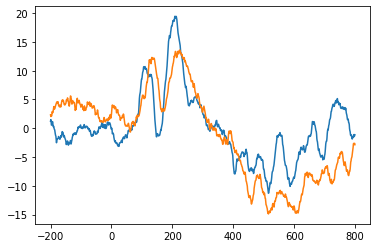

In [1007]:
erp = ERPCORE('3_N170.set',code2type,path='../erpcore/N170/')
erp.get_events(event_id,resmaple=None)
evoked_lst = erp.evoked(['f','c'])
erp.plot_evoked(evoked_lst)

In [930]:
raw = mne.io.read_raw_eeglab('../erpcore/N170/3_N170.set')
raw.set_channel_types({"HEOG_left": 'eog', "HEOG_right": 'eog', "VEOG_lower": 'eog'})
events = mne.events_from_annotations(raw)
descriptions = raw.annotations.description

Reading ../erpcore/N170/3_N170.fdt
Used Annotations descriptions: ['1.0', '10.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '19.0', '2.0', '20.0', '201.0', '202.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '3.0', '30.0', '31.0'

In [931]:
inv_map = {v: int(k.astype(np.float)) for k, v in events[1].items()}

In [932]:
def code2type(code):
    if 1 <= code <= 40:
        return int(1)
    elif 41 <= code <= 80:
        return int(2)
    elif 101 <= code <= 140:
        return int(3)
    elif 141 <= code <= 180:
        return int(4)
    else:
        return int(code)

In [933]:
new_event_dict = {np.str(ii):code2type(ii) for ii in range(1,181) if (ii <=80 or ii>=101)}
new_event_dict[np.str(0)] = 666 #for rejection

In [934]:
#new_event_dict

In [935]:
events_arr = np.zeros(events[0].shape)

In [936]:
for ii in range(events[0].shape[0]):
    events_arr[ii,0] = events[0][ii][0]
    if code2type(inv_map[events[0][ii][2]]) <= 4 and code2type(inv_map[events[0][ii+1][2]]) == 202:
        events_arr[ii,2] = 666
    else:
        events_arr[ii,2] = code2type(inv_map[events[0][ii][2]])

In [937]:
events_arr[:,2]

array([202., 202.,   2., 201.,   3., 201.,   4., 201.,   2., 201.,   4.,
       201.,   1., 201.,   4., 201., 666., 202., 666., 202.,   1., 201.,
         1., 201.,   2., 201.,   1., 201.,   1., 201.,   4., 201.,   4.,
       201.,   4., 201.,   3., 201.,   2., 201.,   1., 201.,   1., 201.,
         2., 201.,   4., 201.,   3., 201.,   4., 201.,   3., 201.,   2.,
       201.,   3., 201.,   1., 201.,   2., 201.,   4., 201.,   1., 201.,
         1., 201.,   4., 201.,   2., 201.,   4., 201.,   4., 201.,   2.,
       201.,   3., 201.,   3., 201.,   2., 201.,   2., 201., 666., 202.,
         1., 201.,   1., 201.,   4., 201.,   1., 201.,   2., 201.,   4.,
       201.,   2., 201.,   4., 201.,   1., 201.,   2., 201.,   4., 201.,
         4., 201.,   3., 201.,   3., 201.,   2., 201.,   2., 201.,   1.,
       201., 666., 202.,   1., 201.,   1., 201., 666., 202.,   2., 201.,
         1., 201.,   3., 201.,   1., 201.,   4., 201.,   3., 201.,   1.,
       201., 666., 202.,   1.,   4., 201.,   4., 20

In [938]:
sum(events_arr[:,2] == 666)/events_arr.shape[0]

0.028037383177570093

In [939]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.8  # end of each epoch (800ms after the trigger)
#baseline = (None, 0)  # means from the first instant to t = 0

In [940]:
n_channels = len(raw.ch_names)
sampling_rate = 1025
info = mne.create_info(raw.ch_names, sampling_rate, raw.get_channel_types())
event_id = dict(f=1, c=2, sf=3, sc=4)

In [944]:
reject = dict(eog=.0003666818589143729)

In [942]:
HEOG_left = raw.get_data()[raw.ch_names.index('HEOG_left'),:]
hl = np.std(HEOG_left)
HEOG_right = raw.get_data()[raw.ch_names.index('HEOG_right'),:]
hr = np.std(HEOG_right)
VEOG_lower = raw.get_data()[raw.ch_names.index('VEOG_lower'),:]
vl = np.std(VEOG_lower)

In [943]:
min(hl,hr,vl)

0.0003666818589143729

In [945]:
np.std(VEOG_lower)

0.0003666818589143729

In [946]:
280e-6

0.00028

In [947]:
raw.ch_names.index('HEOG_left')

30

In [948]:
epochs = mne.Epochs(raw, events_arr.astype(int), event_id, tmin, tmax, baseline=baseline, reject=reject, preload=True)
#custom_epochs = mne.EpochsArray(rawCopy.get_data(), info, events_arr.astype(int), tmin, event_id)

302 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 302 events and 1025 original time points ...
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    Rejecting  epoch based on EOG : ['VEOG_lower']
    

In [1014]:
dir(epochs)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bad_dropped',
 '_channel_type_idx',
 '_check_consistency',
 '_check_metadata',
 '_compute_aggregate',
 '_current',
 '_data',
 '_decim',
 '_decim_slice',
 '_detrend_offset_decim',
 '_do_delayed_proj',
 '_evoked_from_epoch_data',
 '_filename',
 '_get_channel_positions',
 '_get_data',
 '_get_epoch_from_raw',
 '_getitem',
 '_is_good_epoch',
 '_item_to_select',
 '_keys_to_idx',
 '_metadata',
 '_name',
 '_offset',
 '_pick_drop_channels',
 '_project_epoch',
 '_projector',
 '_raw',
 '_raw_times',
 '_reject_setup',
 '_reject_time',
 '_set_ch

In [950]:
#epochs.load_data()
sampling_rate = 256
epochs.resample(sampling_rate)

<Epochs  |   279 events (all good), -0.200195 - 0.795898 sec, baseline [None, 0], ~18.1 MB, data loaded,
 'c': 67
 'f': 73
 'sc': 67
 'sf': 72>

In [951]:
evokedF = epochs['f'].average()
evokedC = epochs['c'].average()

In [952]:
xx = [ii*(1000/sampling_rate)-200 for ii in range(sampling_rate)] 

In [953]:
evokedF.to_data_frame().columns

Index(['time', 'FP1', 'F3', 'F7', 'FC3', 'C3', 'C5', 'P3', 'P7', 'P9', 'PO7',
       'PO3', 'O1', 'Oz', 'Pz', 'CPz', 'FP2', 'Fz', 'F4', 'F8', 'FC4', 'FCz',
       'Cz', 'C4', 'C6', 'P4', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
      dtype='object')

Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB



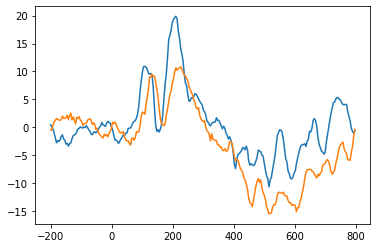

In [954]:
contrast = mne.combine_evoked([evokedF, -evokedC], weights='equal')
yf = evokedF.to_data_frame()['PO8']
yc = evokedC.to_data_frame()['PO8']
fdata1 = mne.filter.notch_filter(yf,sampling_rate,60,filter_length="1.2s",method="spectrum_fit")
fdata = mne.filter.filter_data(fdata1,sampling_rate,0.1,None,filter_length=20,method="iir")
cdata1 = mne.filter.notch_filter(yc,sampling_rate,60,filter_length="1.2s",method="spectrum_fit")
cdata = mne.filter.filter_data(cdata1,sampling_rate,0.1,None,filter_length=20,method="iir")
#plt.plot(xx,yf,xx,yc)
plt.plot(xx,fdata,xx,cdata)